# Diabetes Prediction using Logistic RegressionThis notebook demonstrates how to load a dataset, preprocess it, train a machine learning model, and make predictions.

In [1]:


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 1: Load the Dataset

In [19]:
# 1. Load the dataset
import pandas as pd
df = pd.read_csv('diabetes.csv')

## Step 2: Explore Dataset

In [20]:
# 2. Check basic info
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [12]:
# 📊 Visualization Section
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

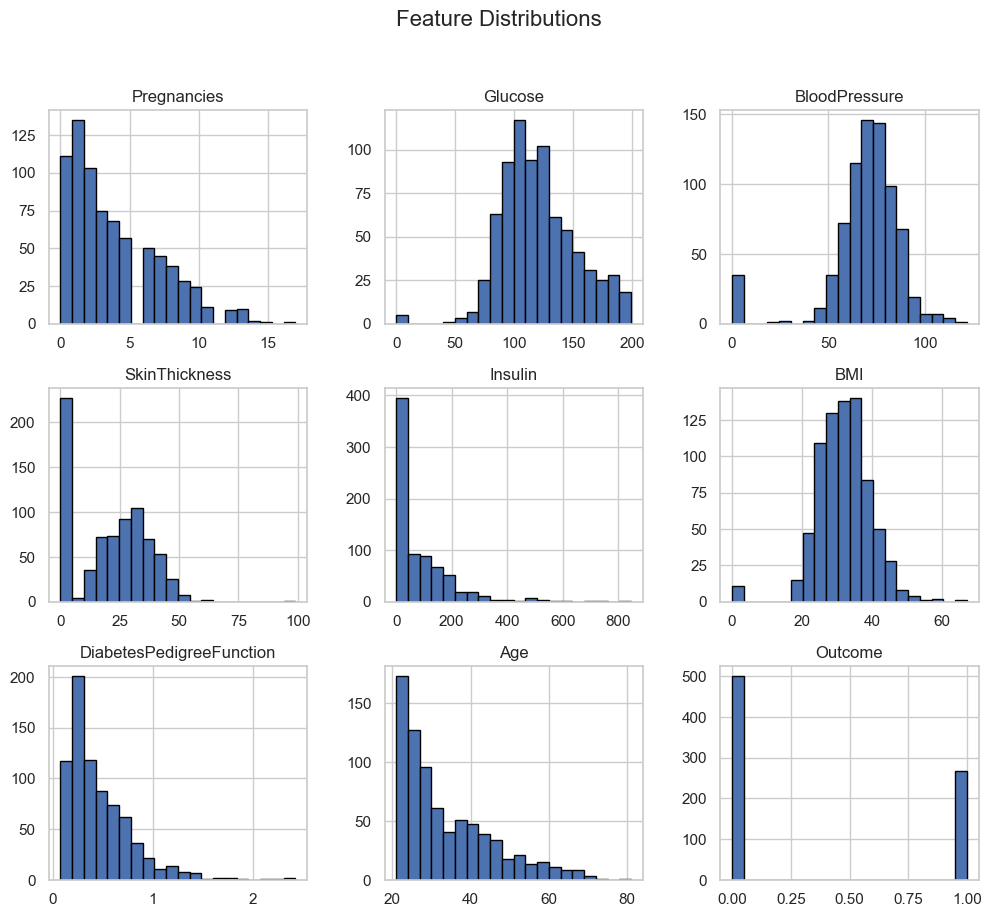

In [13]:
# 1. Distribution of each feature
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

C:\Users\Sambit1\AppData\Local\Temp\ipykernel_20672\3504992756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="coolwarm")


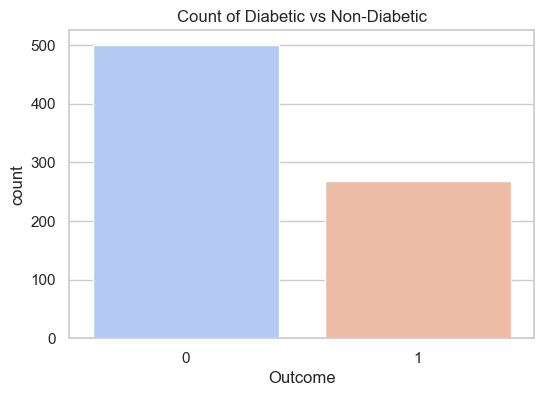

In [14]:
# 2. Count plot of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette="coolwarm")
plt.title("Count of Diabetic vs Non-Diabetic")
plt.show()

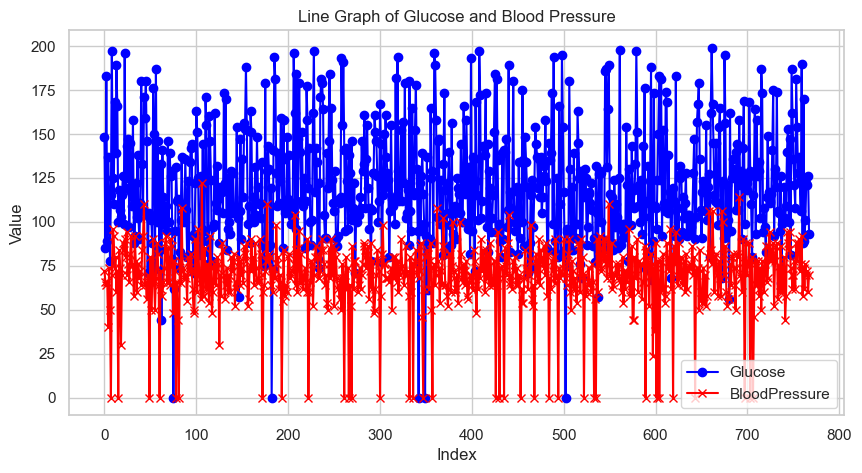

In [17]:
# 5. Line graph of selected features
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Glucose'], label='Glucose', color='blue', marker='o')
plt.plot(df.index, df['BloodPressure'], label='BloodPressure', color='red', marker='x')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Graph of Glucose and Blood Pressure")
plt.legend()
plt.show()

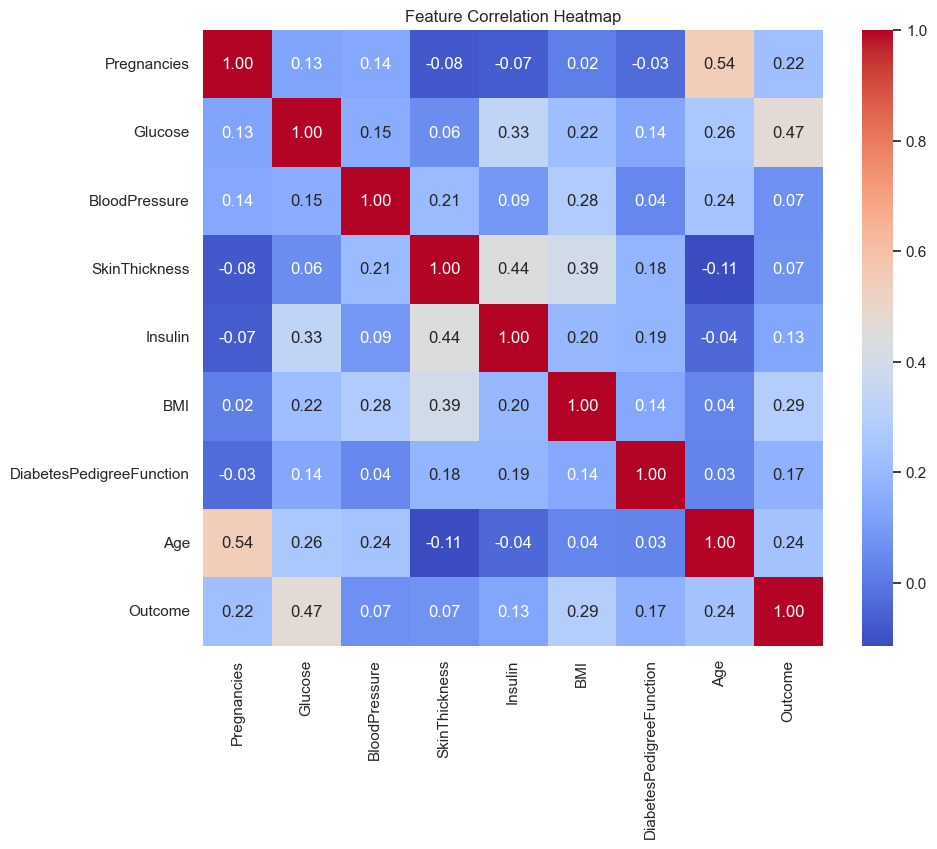

In [15]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

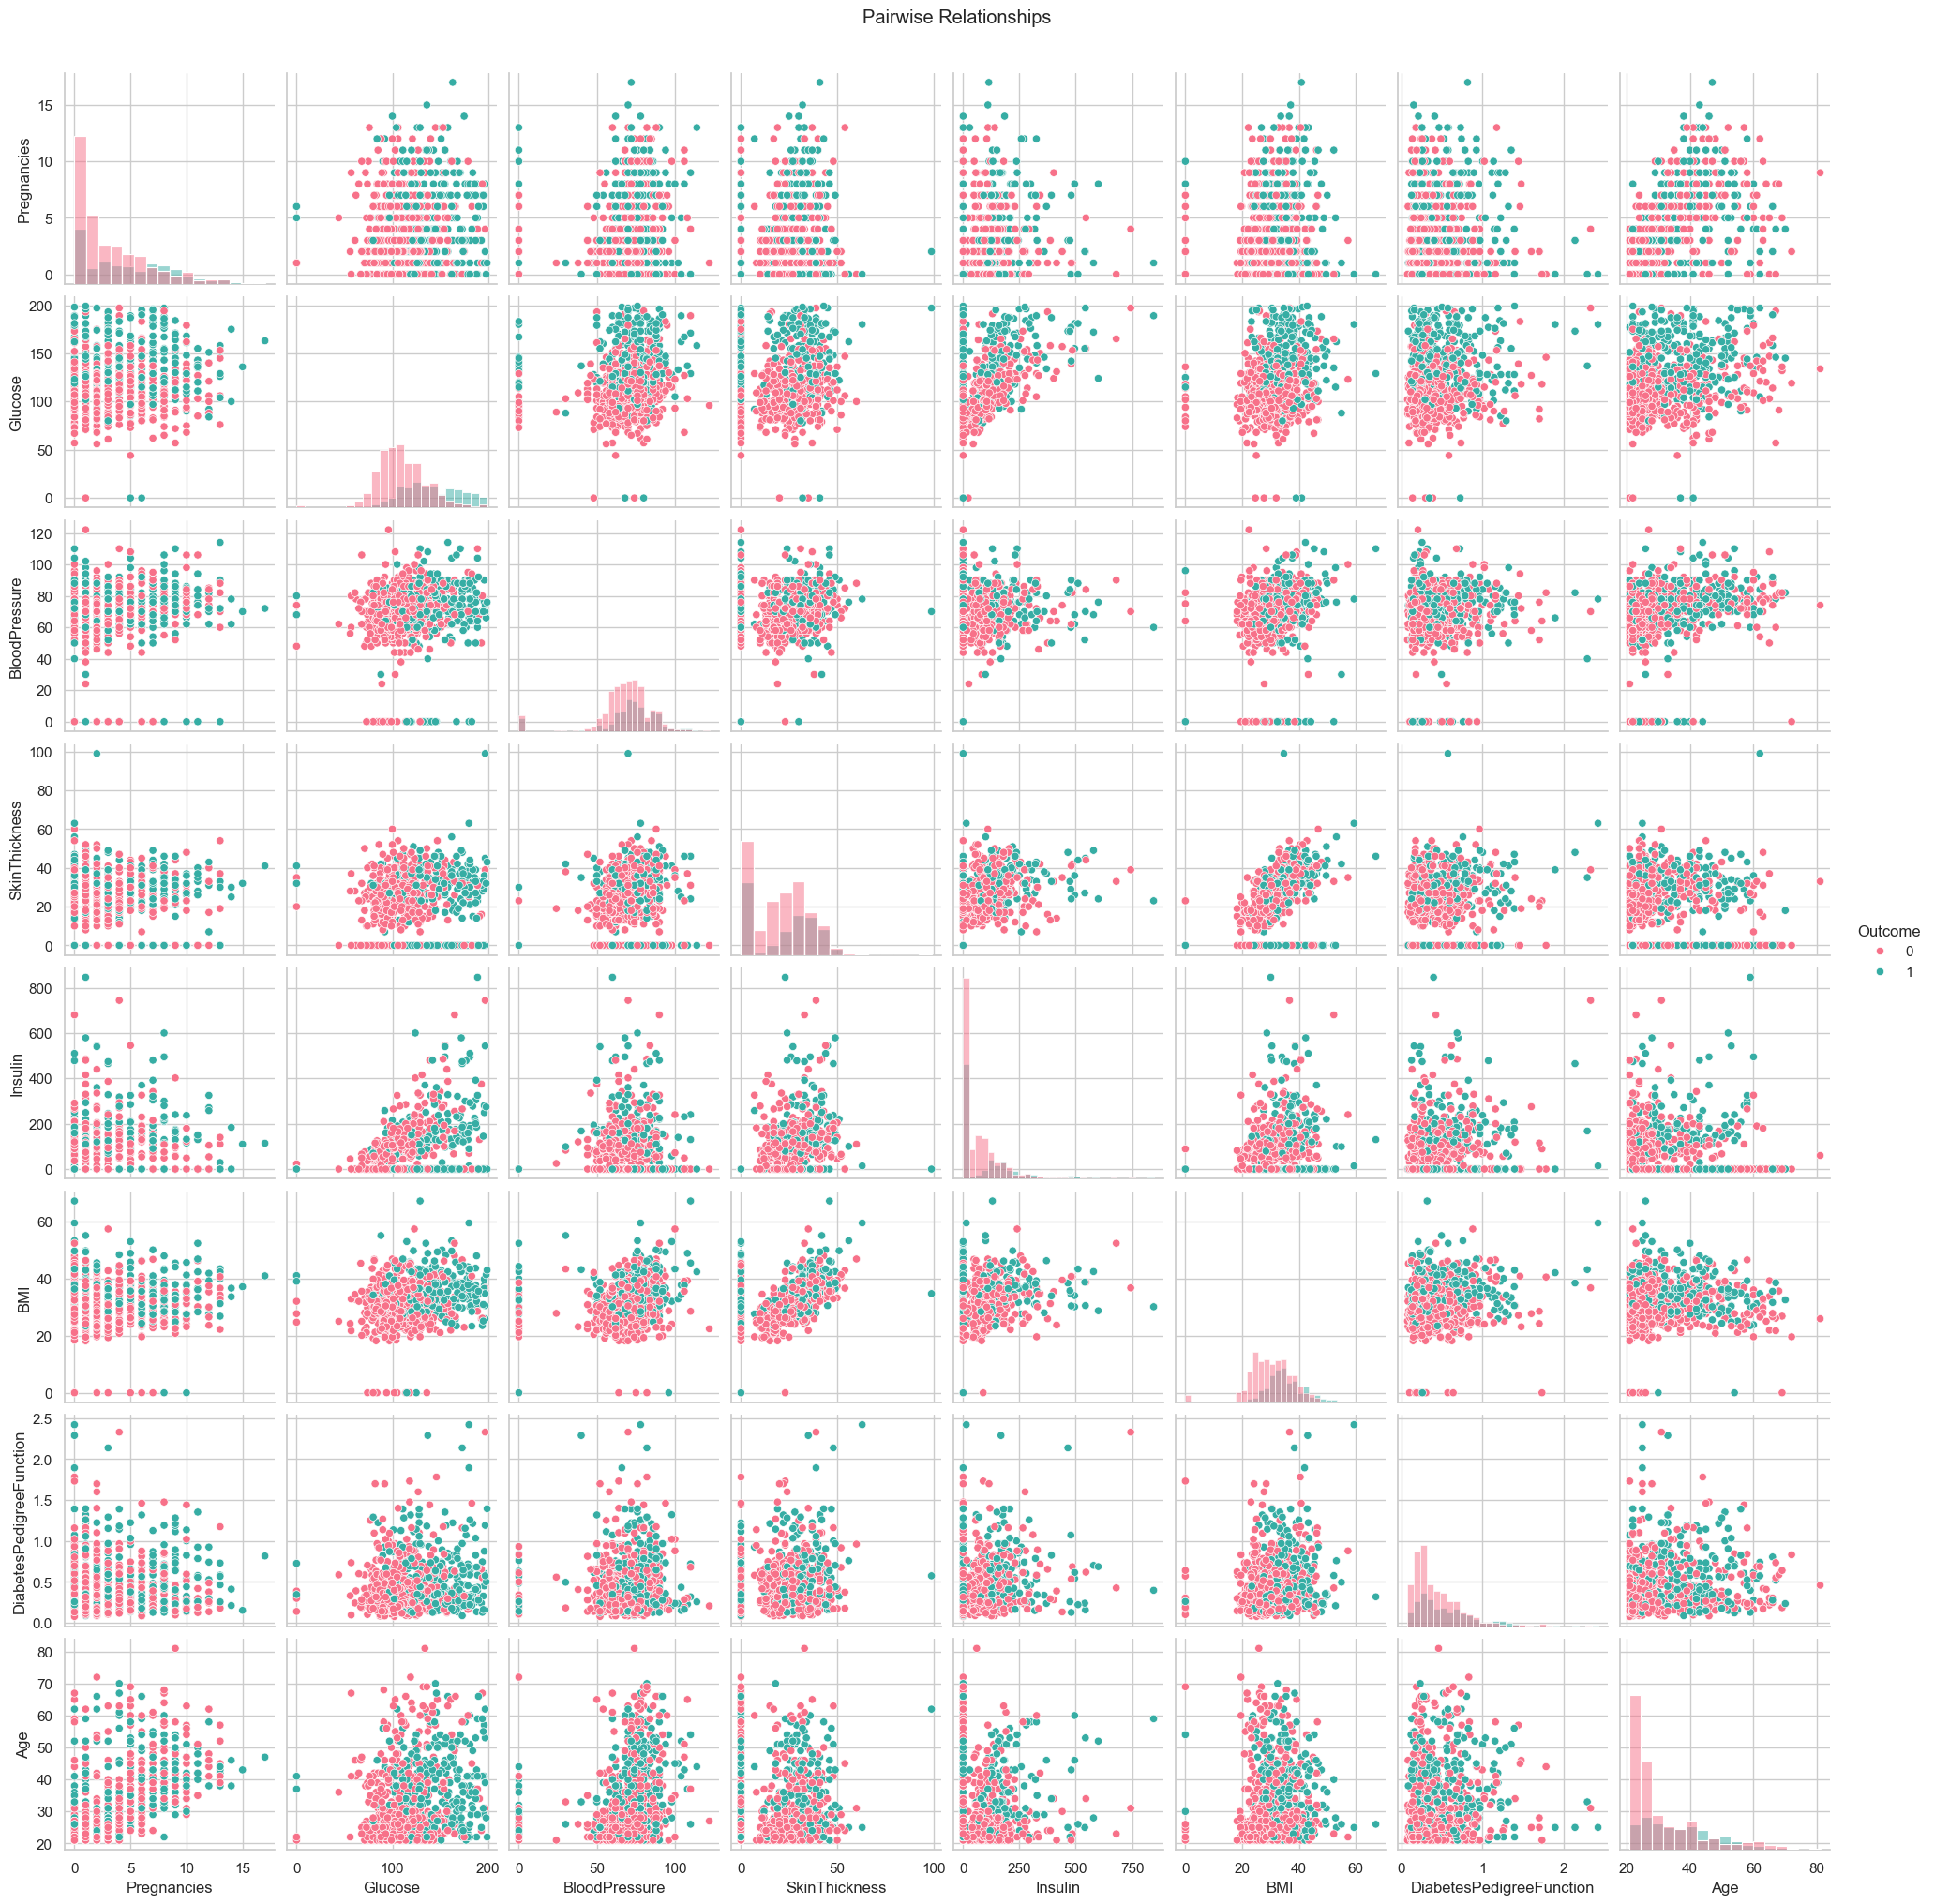

In [16]:
# 4. Pair plot (optional: may be heavy for large datasets)
sns.pairplot(df, hue='Outcome', diag_kind="hist", palette="husl")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

## Step 3: Split Features and Target

In [5]:
# 3. Separate features (X) and target (y)
# Change 'Outcome' to the actual target column in your CSV
X = df.drop('Outcome', axis=1)  
y = df['Outcome']

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Step 4: Train-Test Split

In [29]:
import sklearn
help(sklearn)

Help on package sklearn:

NAME
    sklearn - Configure global settings and get information about the working environment.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _built_with_meson
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    gaussian_process (package)
    impute (package)
    inspection (package)
    isotonic
    kernel_approximation
    kernel_ridge
    linear_model (package)
    manifold (package)
    metrics (package)
    mixture (package)
    model_selection (package)
    multiclass
    multioutput
    naive_bayes
    neig

In [38]:
from sklearn.model_selection import train_test_split
# 4. Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=32)

In [39]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
196,1,105,58,0,0,24.3,0.187,21
22,7,196,90,0,0,39.8,0.451,41
137,0,93,60,25,92,28.7,0.532,22
469,6,154,78,41,140,46.1,0.571,27
627,0,132,78,0,0,32.4,0.393,21
...,...,...,...,...,...,...,...,...
403,9,72,78,25,0,31.6,0.280,38
88,15,136,70,32,110,37.1,0.153,43
310,6,80,66,30,0,26.2,0.313,41
555,7,124,70,33,215,25.5,0.161,37


## Step 5: Feature Scaling

In [46]:
# 5. Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[-0.84574616, -0.46116412, -0.61466591, ..., -1.01555797,
        -0.8448966 , -1.03789011],
       [ 0.92455433,  2.39012328,  1.07939438, ...,  0.99201638,
        -0.05528399,  0.65201847],
       [-1.14079624, -0.83715807, -0.50878714, ..., -0.4456659 ,
         0.18698352, -0.95339468],
       ...,
       [ 0.62950425, -1.24448484, -0.19115084, ..., -0.76946821,
        -0.46803603,  0.65201847],
       [ 0.92455433,  0.13415962,  0.0206067 , ..., -0.86013286,
        -0.92266148,  0.31403676],
       [-1.14079624,  0.66681771,  0.76175808, ...,  0.03356153,
        -0.10912121, -0.95339468]])

In [48]:
X_test_scaled

array([[ 0.62950425,  0.85481468,  0.55000054, ..., -0.34204916,
        -0.87181521,  1.41247734],
       [ 0.92455433,  0.69815053,  1.07939438, ..., -0.22548032,
        -1.02136305,  0.82100933],
       [-0.55069608, -0.02250452, -3.6851502 , ..., -1.62430632,
         1.08427057,  3.27137678],
       ...,
       [-0.84574616, -0.93115655, -0.40290838, ..., -0.91194123,
         2.38832776, -0.69990839],
       [ 1.21960441,  1.48147125,  1.92642453, ...,  0.70707035,
        -0.91069765,  0.82100933],
       [ 1.21960441,  0.19682528,  0.23236424, ..., -0.80832449,
        -0.91967052,  0.48302762]])

In [51]:
y_test

642    1
695    1
453    0
565    0
99     1
      ..
335    0
307    0
383    0
662    1
478    0
Name: Outcome, Length: 154, dtype: int64

## Step 6: Train the Model

In [8]:
# 6. Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Step 7: Make Predictions

In [9]:
# 7. Make predictions
y_pred = model.predict(X_test_scaled)

## Step 8: Evaluate Model Performance

In [10]:
# 8. Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[79 20]
 [18 37]]


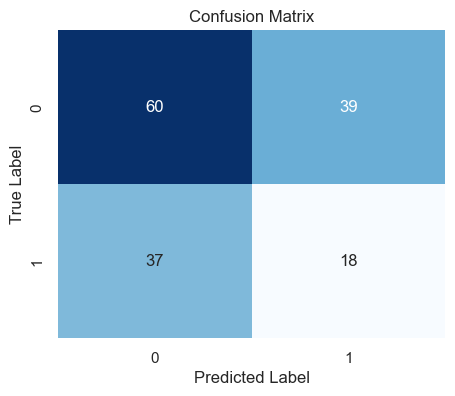

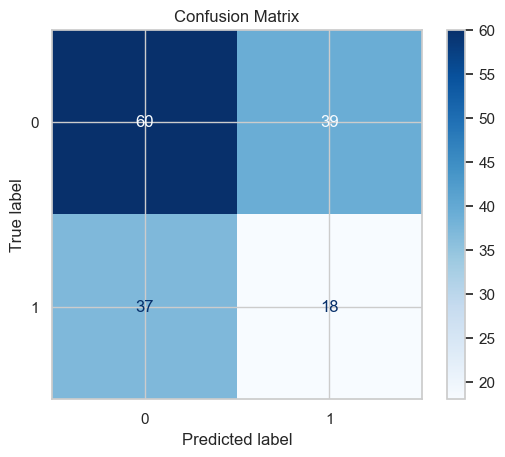

In [52]:
# 📊 Confusion Matrix Visualization
from sklearn.metrics import ConfusionMatrixDisplay

# Option 1: Using seaborn heatmap
plt.figure(figsize=(5,4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Option 2: Using sklearn's built-in display (nice for quick use)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


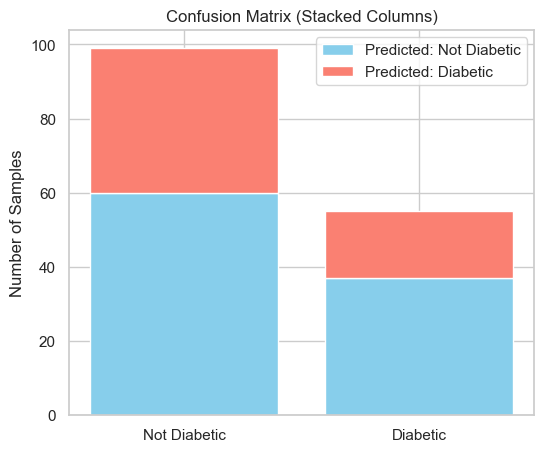

In [53]:
# 📊 Confusion Matrix as Stacked Column Chart
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Create labels for classes
labels = ["Not Diabetic", "Diabetic"]

# Stacked bar chart
x = np.arange(len(labels))  # positions
plt.figure(figsize=(6,5))
plt.bar(x, cm[:,0], label="Predicted: Not Diabetic", color='skyblue')
plt.bar(x, cm[:,1], bottom=cm[:,0], label="Predicted: Diabetic", color='salmon')

plt.xticks(x, labels)
plt.ylabel("Number of Samples")
plt.title("Confusion Matrix (Stacked Columns)")
plt.legend()
plt.show()


## Step 9: Predict for a New Sample

In [11]:
# 9. Example: Predict for a new patient
# Replace the values with actual patient data from your CSV columns
sample_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Example row
sample_scaled = scaler.transform(sample_data)
sample_pred = model.predict(sample_scaled)
print("\nPrediction for new sample:", "Diabetic" if sample_pred[0] == 1 else "Not Diabetic")


Prediction for new sample: Diabetic


C:\Users\Sambit1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
# 💾 Save the trained model and scaler
import joblib

# Save model
joblib.dump(model, "diabetes_model.pkl")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [55]:
# 🔄 Load model and scaler
loaded_model = joblib.load("diabetes_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example prediction with loaded model
sample_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]
sample_scaled = loaded_scaler.transform(sample_data)
sample_pred = loaded_model.predict(sample_scaled)
print("Prediction:", "Diabetic" if sample_pred[0] == 1 else "Not Diabetic")

Prediction: Diabetic


C:\Users\Sambit1\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
